In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('/content/marketing_campaign_dataset.csv')

In [4]:
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)
df['ROI'] = pd.to_numeric(df['ROI'], errors='coerce')
df['CTR'] = df['Clicks'] / df['Impressions']
df['CPC'] = df['Acquisition_Cost'] / df['Clicks']
df['Estimated_Revenue'] = df['Acquisition_Cost'] * (df['ROI'] + 1)

Cleans and transforms the dataset by performing the following:  
- Removes currency symbols and converts the `Acquisition_Cost` column to float.  
- Converts `ROI` to numeric, coercing non-numeric values to NaN.  
- Calculates the `CTR` (Click-Through Rate) as Clicks divided by Impressions.  
- Computes `CPC` (Cost Per Click) as Acquisition Cost divided by Clicks.  
- Estimates revenue using the formula `Acquisition_Cost * (ROI + 1)`.

In [5]:
df[['Channel_Used', 'Acquisition_Cost', 'ROI', 'CTR', 'CPC', 'Estimated_Revenue']].head()

,Channel_Used,Acquisition_Cost,ROI,CTR,CPC,Estimated_Revenue
0,Google Ads,16174.0,6.29,0.263267,31.964427,117908.46
1,Google Ads,11566.0,5.61,0.015419,99.706897,76451.26
2,YouTube,10200.0,7.18,0.075864,17.465753,83436.00
3,YouTube,12724.0,5.55,0.119231,58.635945,83342.20
4,YouTube,16452.0,6.50,0.090217,43.408971,123390.00


Displays the first few rows of selected metrics (`Channel_Used`, `Acquisition_Cost`, `ROI`, `CTR`, `CPC`, `Estimated_Revenue`) for initial data inspection.

In [6]:
channel_summary = df.groupby('Channel_Used').agg({
    'Acquisition_Cost': 'sum',
    'ROI': 'mean',
    'CTR': 'mean',
    'CPC': 'mean',
    'Estimated_Revenue': 'sum'
}).reset_index()

Aggregates performance metrics by marketing channel:  
- Sums `Acquisition_Cost` and `Estimated_Revenue`.  
- Averages `ROI`, `CTR`, and `CPC` for each channel.  
This summary provides a high-level view of each channel's effectiveness.


<ipython-input-7-120e8a2da4fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_summary, x='Channel_Used', y='ROI', palette='coolwarm')


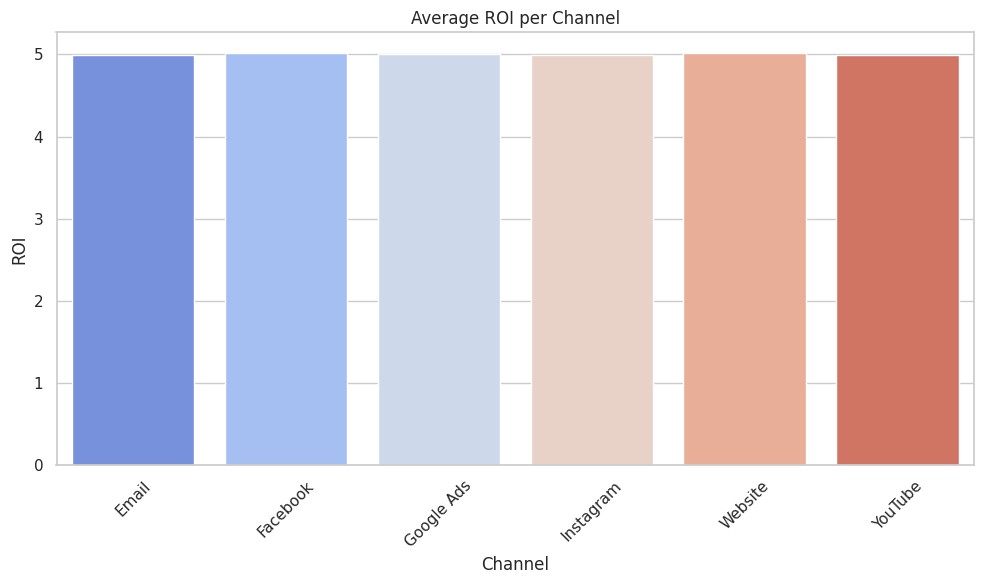

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_summary, x='Channel_Used', y='ROI', palette='coolwarm')
plt.title('Average ROI per Channel')
plt.xticks(rotation=45)
plt.ylabel('ROI')
plt.xlabel('Channel')
plt.tight_layout()
plt.show()

<ipython-input-8-f94b9444f3e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_summary, x='Channel_Used', y='CPC', palette='viridis')


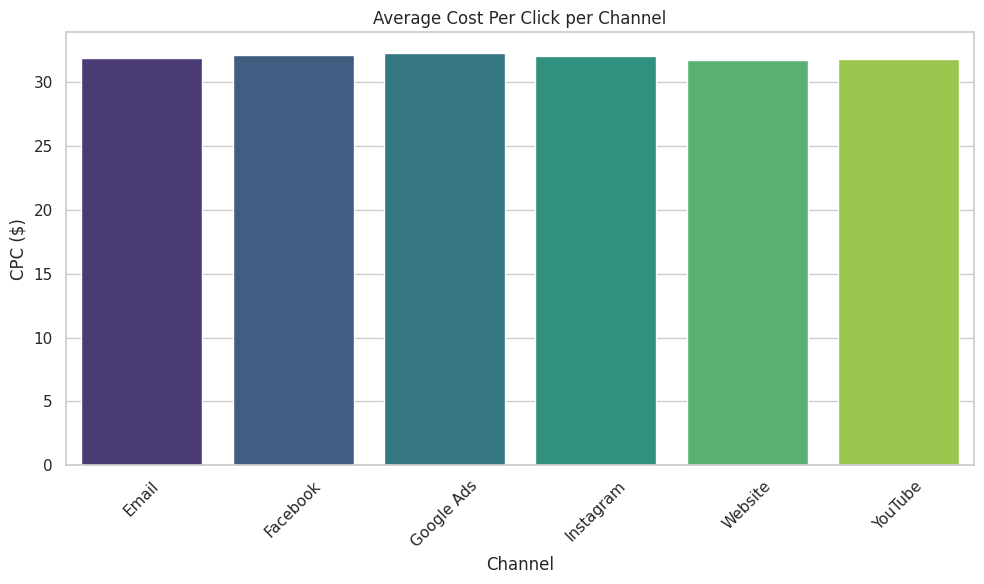

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_summary, x='Channel_Used', y='CPC', palette='viridis')
plt.title('Average Cost Per Click per Channel')
plt.xticks(rotation=45)
plt.ylabel('CPC ($)')
plt.xlabel('Channel')
plt.tight_layout()
plt.show()

<ipython-input-9-b3f3f8dc8a11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_summary, x='Channel_Used', y='CTR', palette='magma')


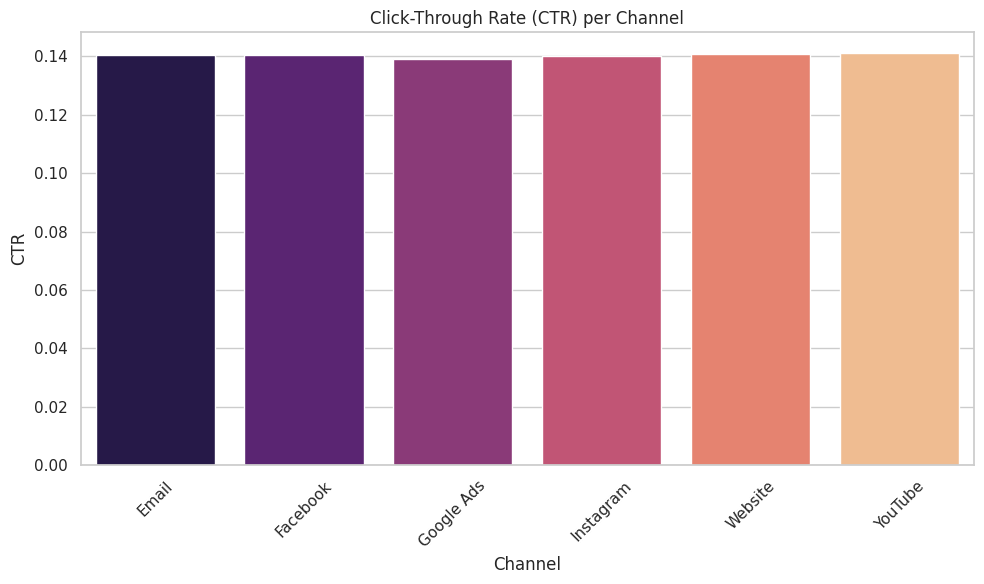

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_summary, x='Channel_Used', y='CTR', palette='magma')
plt.title('Click-Through Rate (CTR) per Channel')
plt.xticks(rotation=45)
plt.ylabel('CTR')
plt.xlabel('Channel')
plt.tight_layout()
plt.show()

<ipython-input-10-ae1aa7b4038c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_summary, x='Channel_Used', y='Estimated_Revenue', palette='plasma')


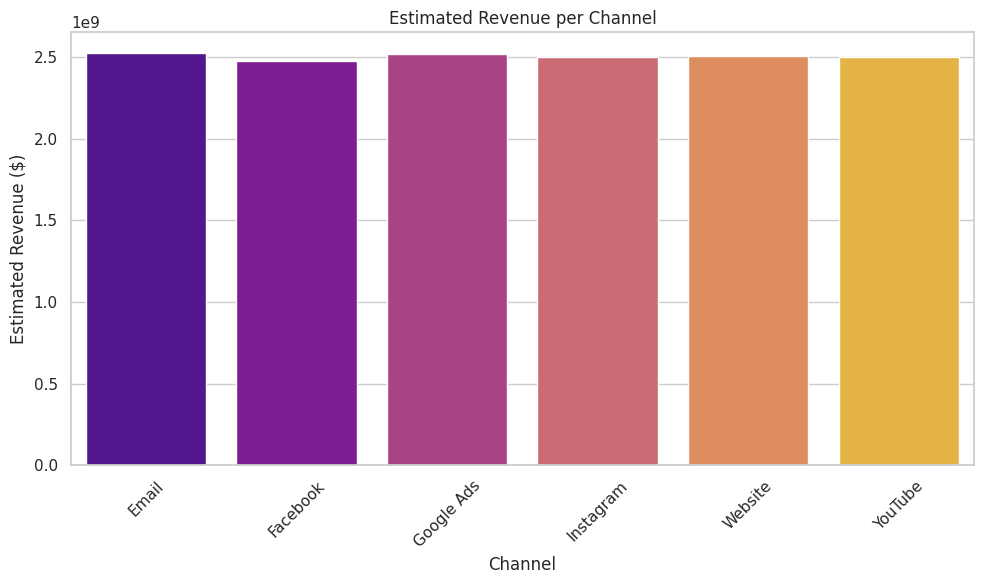

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_summary, x='Channel_Used', y='Estimated_Revenue', palette='plasma')
plt.title('Estimated Revenue per Channel')
plt.xticks(rotation=45)
plt.ylabel('Estimated Revenue ($)')
plt.xlabel('Channel')
plt.tight_layout()
plt.show()

In [11]:
channel_summary.sort_values(by='ROI', ascending=False)

,Channel_Used,Acquisition_Cost,ROI,CTR,CPC,Estimated_Revenue
1,Facebook,410595258.0,5.018699,0.140499,32.129253,2.474541e+09
4,Website,416593500.0,5.014167,0.140971,31.779545,2.504152e+09
2,Google Ads,418912314.0,5.003141,0.139190,32.309304,2.516724e+09
0,Email,420874104.0,4.996487,0.140543,31.881471,2.524644e+09
5,YouTube,416778582.0,4.993754,0.141196,31.872808,2.501105e+09
3,Instagram,417124850.0,4.988706,0.140037,32.080786,2.497101e+09


###  ROI per Dollar Spent Calculation

This cell calculates the return on investment (ROI) per dollar spent for each marketing channel.
It divides the total estimated revenue by total acquisition cost for each channel to determine which performs best.


In [24]:
roi_per_dollar = df.groupby('Channel_Used')['Estimated_Revenue'].sum() / df.groupby('Channel_Used')['Acquisition_Cost'].sum()
roi_per_dollar = roi_per_dollar.sort_values(ascending=False)

print("📈 ROI per $1 spent per channel:")
print(roi_per_dollar)


📈 ROI per $1 spent per channel:
Channel_Used
Facebook      6.026715
Website       6.011021
Google Ads    6.007758
YouTube       6.001040
Email         5.998573
Instagram     5.986460
dtype: float64


###  Define Optimization Problem with Business Constraints

We define a budget optimization problem with:
- A total marketing budget
- Minimum and maximum spending limits per channel (to ensure balanced distribution)
- An objective to maximize expected revenue based on ROI per dollar

We convert this to a linear programming problem using `scipy.optimize.linprog`.


###  Solve the Linear Programming Problem

This cell solves the budget allocation problem under constraints using linear programming.
It prints out the optimized budget allocation for each channel and the expected total revenue.


###  Handle Optimization Failure with Weighted Fallback

If the optimization fails (e.g., due to constraints), this fallback strategy distributes the budget proportionally across all channels based on their ROI.
This ensures every channel gets a fair share while still being ROI-driven.


In [29]:
from scipy.optimize import linprog
import numpy as np
import pandas as pd
channels = roi_per_dollar.index.tolist()
roi_values = roi_per_dollar.values
total_budget = 10000000000

min_perc = 0.1
max_perc = 0.3
min_cap = total_budget * min_perc
max_cap = total_budget * max_perc

bounds = [(min_cap, max_cap) for _ in channels]

c = -roi_values
A = [np.ones(len(channels))]
b = [total_budget]

res = linprog(c=c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

if res.success:
    print("\nFinal Optimized Allocation (with bounds):")
    for i, channel in enumerate(channels):
        print(f"{channel}: ${res.x[i]:.2f} allocated")

    expected_revenue = sum(res.x * roi_values)
    print(f"\n Expected Revenue: ${expected_revenue:.2f} from ${total_budget} budget")
else:
    print(" Optimization failed. Falling back to weighted allocation.")

    weights = roi_per_dollar / roi_per_dollar.sum()
    allocations = weights * total_budget
    for channel, alloc in zip(channels, allocations):
        print(f"{channel}: ${alloc:.2f} allocated")

    expected_revenue = sum(allocations * roi_values)
    print(f"\n Expected Revenue (Weighted Fallback): ${expected_revenue:.2f}")



Final Optimized Allocation (with bounds):
Facebook: $3000000000.00 allocated
Website: $3000000000.00 allocated
Google Ads: $1000000000.00 allocated
YouTube: $1000000000.00 allocated
Email: $1000000000.00 allocated
Instagram: $1000000000.00 allocated

 Expected Revenue: $60107041408.27 from $10000000000 budget
